### Load prediction (3d array)

In [18]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"
from IPython.display import HTML

### take one batch out and convert to ppm

In [5]:
data_path = "../../saves/"
file_name = "pred_0000.npz"
pred= np.load(data_path+file_name, 'r')

img = pred['arr_0'].squeeze()
print(img.shape)
num_frame = img.shape[0]
#flatten the batch dimension
h, w = img.shape[2], img.shape[3]

img_b0 = np.reshape(img[:,0,:,:], (-1, h, w,1))
print('reshaped', img_b0.shape)
np.savez(data_path+"seq2seq/"+file_name,img_b0)
# run manta to convert to ppm

(5, 5, 64, 64)
('reshaped', (5, 64, 64, 1))


### visualization of predictions

<IPython.core.display.Javascript object>


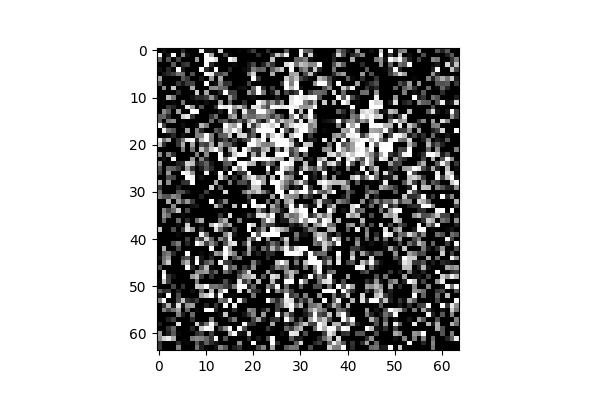

In [16]:
pred_path = "../../saves/seq2seq/"
sim_id = str(0).zfill(4)

fig = plt.figure()
ims = []
for img_id in range(num_frame):
    img = Image.open(pred_path+'pred_'+sim_id + "_"+ str(img_id)+'.ppm')
    im = plt.imshow(img, animated=True)
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

### comparison with ground truth

<IPython.core.display.Javascript object>


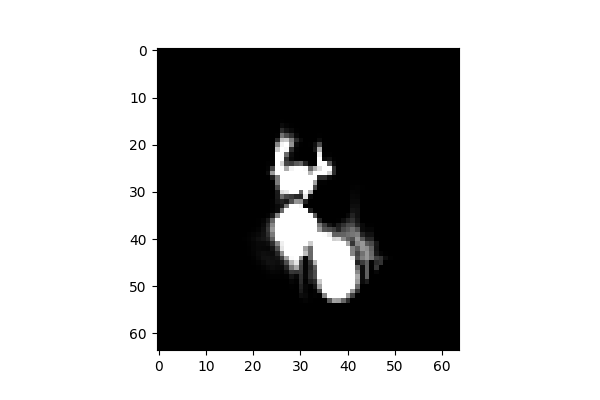

In [15]:
%matplotlib notebook
import matplotlib.animation as animation
plt.rcParams["animation.html"] = "html5"
from IPython.display import HTML

dir_path ="../../tensorflow/test_data/sim_1000/"

fig = plt.figure()
ims = []
for i in range(num_frame):
    img_id = str(i).zfill(4)
    img = Image.open(dir_path+'density_low_'+img_id+'.ppm')
    im = plt.imshow(img, animated=True)
    
    fname = dir_path+"pred_s"+sim_id+"_t"+img_id+".npz"
    img = np.load(fname)
    img=img['arr_0'].squeeze()
    im_true = plt.imshow(img, animated=False)
    
    ims.append([im])

ani = animation.ArtistAnimation(fig, ims, interval=50, blit=True)

### compare pressure field


<IPython.core.display.Javascript object>


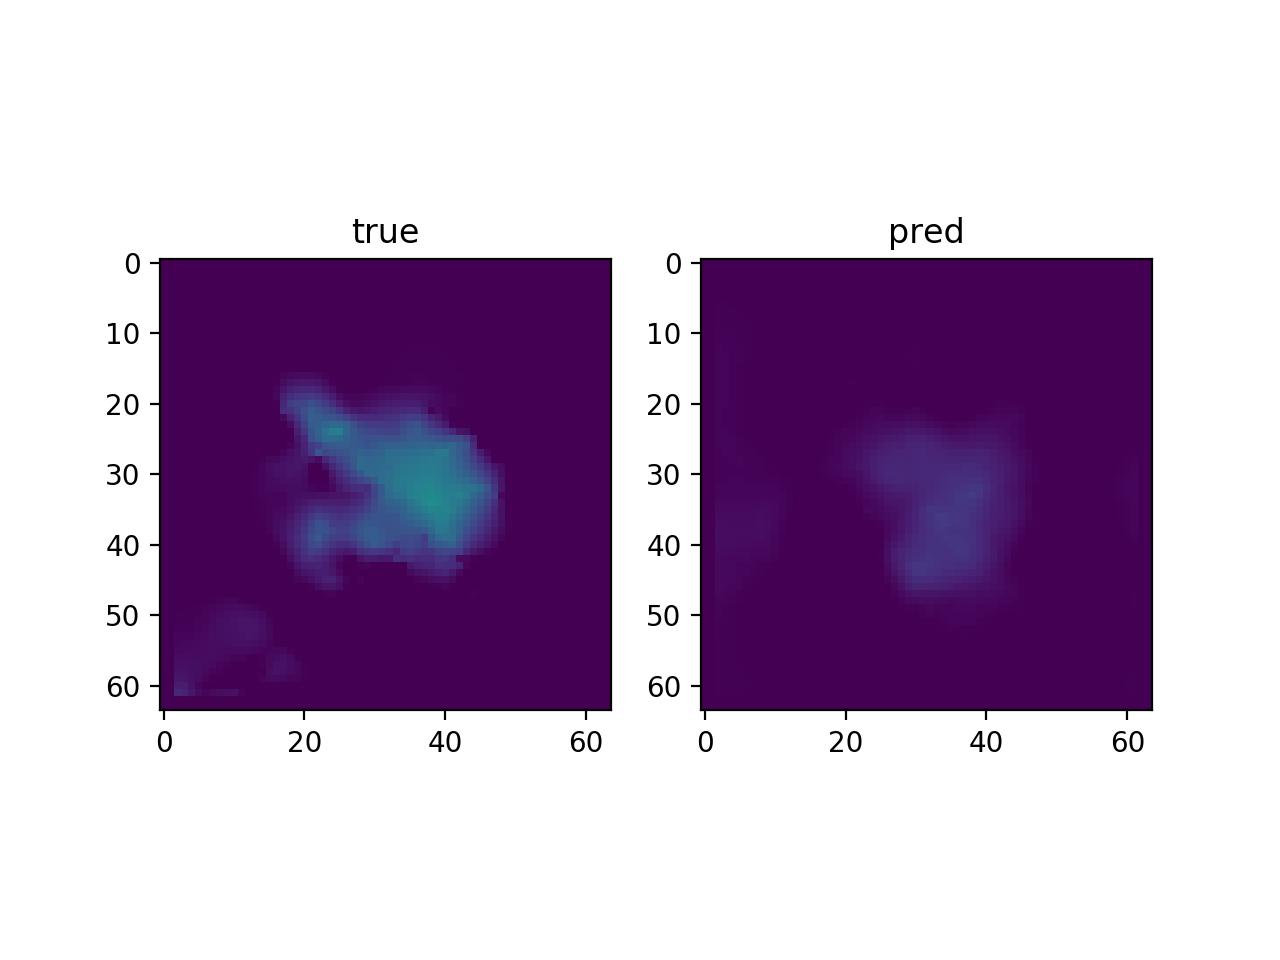

In [5]:
#https://matplotlib.org/examples/animation/animate_decay.html
%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation

datetime="04-23-18-23-34-27"#"04-22-18-22-08-53"#04-04-18-11-18-36"
sim_id = str(1000).zfill(4)
data_path ="../../tensorflow/test_data/"
dir_path ="../../saves/"+datetime+"/"


fig, (ax1, ax2) = plt.subplots(1,2)

im_true = ax1.imshow(np.random.rand(64,64), animated=True)
im_pred = ax2.imshow(np.random.rand(64,64), animated=True)
ax1.set_title("true")
ax2.set_title("pred")


idx =0
def updatefig(*args):
    global idx
    idx +=1
    img_id = str(idx).zfill(4)
    #true
    fname = data_path+"sim_"+sim_id+"/pressure_low_"+img_id+".npz"
    img = np.load(fname)
    dat_true=img['arr_0'].squeeze()

    #pred
    fname = dir_path+"pred_s"+sim_id+"_t"+img_id+".npz"
    img = np.load(fname)
    dat_pred=img['arr_0'].squeeze()
    # normalize back
    dat_pred = (dat_pred*0.0088)+0.00015
    
    # update the data
    im_true.set_array(dat_true)
    im_pred.set_array(dat_pred)
    return im_true, im_pred,

    
ani = animation.FuncAnimation(fig, updatefig, interval=50, blit=True, repeat=True)
Writer = animation.writers['ffmpeg']
writer = Writer(fps=15, metadata=dict(artist='Me'), bitrate=1800)

# ani.save('lstm_pressure.mp4', writer=writer)

# plt.show()